### Non linear classification

In [1]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
X,Y=make_circles(n_samples=1000,noise=0.02)

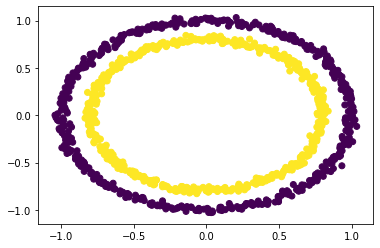

In [3]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [4]:
def phi(X):
    X1=X[:,0]
    X2=X[:,1]
    X3=X1**2+X2**2
    X_=np.zeros((X.shape[0],3))
    print(X_.shape)
    X_[:,:-1]=X
    X_[:,-1]=X3
    return X_

In [5]:
X_=phi(X)

(1000, 3)


In [6]:
print(X[:3,:])

[[ 0.72742676 -0.34996058]
 [-0.41708071 -0.67274797]
 [-0.76782142 -0.66143586]]


In [7]:
print(X_[:3,:])

[[ 0.72742676 -0.34996058  0.65162209]
 [-0.41708071 -0.67274797  0.62654615]
 [-0.76782142 -0.66143586  1.02704712]]


In [8]:
def plot3d(X,show=True):
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,c=Y)
    
    if(show==True):
        plt.show()
    return ax

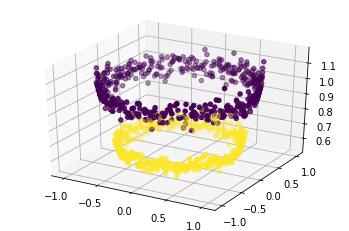

In [9]:
ax = plot3d(X_)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [11]:
lr = LogisticRegression()

In [12]:
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 46.2000


In [13]:

acc = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(3D) is %.4f"%(acc*100))

Accuracy X(3D) is 100.0000


In [14]:
lr.fit(X_,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
wts = lr.coef_
print(wts)

[[  0.02270109   0.04205769 -11.65336444]]


In [16]:
bias = lr.intercept_

In [17]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [18]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)

[[0.79948925 0.80143728 0.80338531 0.80533334]
 [0.80309831 0.80504634 0.80699437 0.8089424 ]
 [0.80670737 0.8086554  0.81060343 0.81255146]
 [0.81031643 0.81226446 0.81421249 0.81616052]]


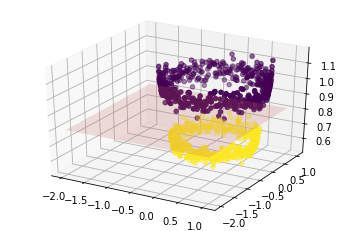

In [19]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.2,color='salmon')
plt.show()